<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb[importers]

In [2]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [15]:
import pandas as pd
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
sweep = api.sweep("3dsmile/thesis sweep/sweep/4ulbfopv")


['LEGACY_QUERY',
 'QUERY',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_entity',
 '_repr_html_',
 'best_run',
 'client',
 'config',
 'display',
 'entity',
 'expected_run_count',
 'get',
 'id',
 'load',
 'name',
 'order',
 'path',
 'project',
 'runs',
 'snake_to_camel',
 'to_html',
 'url',
 'username']

In [51]:
runs = sweep.runs
# data = [i.history() for i in runs]
len(runs)

799

In [ ]:
history = [run.history() for run in runs]

In [86]:
top1_mean = [run["top1"].mean() for  run in history]
top1_std = [run["top1"].std() for run in history]
topn_mean = [run["topn"].mean() for  run in history]
topn_std = [run["topn"].std() for  run in history]

In [87]:
data = {
    'top1_mean': top1_mean,
    'topn_mean': topn_mean,
    'top1_std': top1_std,
    'topn_std': topn_std
}

import pickle
# Save the dictionary to a pickle file
with open('sweep.pkl', 'wb') as f:
    pickle.dump(data, f)



In [88]:
data = []
for i in range(len(top1_mean)):
  data.append({
      "top1_mean":top1_mean[i],
      "topn_mean":topn_mean[i],
      "top1_std":top1_std[i],
      "topn_std":topn_std[i],
      "beam": runs[i].config["beam"],
      "alpha": runs[i].config["alpha"],
      "nImages": runs[i].config["nImages"],
      "temp": runs[i].config["temp"],
  })

In [89]:
df = pd.DataFrame(data)

In [90]:
df.to_csv("inf_sweep.csv")

In [91]:
import numpy as np
np.max(df.query(f"nImages=={1} & beam=={1}")["top1_mean"]).item()

15.95

In [92]:
arr1 = []
for nImages in range(1,4):
  arr1.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["top1_mean"]).item() for beam in range(1,6)])


<Axes: >

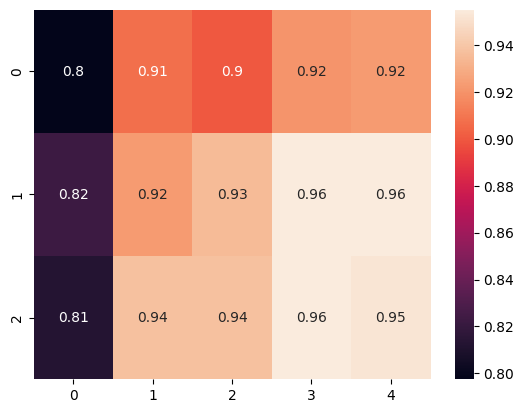

In [102]:
arr = []
for nImages in range(1,4):
  arr.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["topn_mean"]).item() for beam in range(1,6)])

import seaborn as sns
sns.heatmap(np.array(arr)/20, annot=True)